## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [34]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128,64], drp_ratio=0.0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x=keras.layers.Dense(units=n_units, 
                                 activation='relu', 
                                 name='hidden_layer'+str(i+1))(input_layer)
            x=Dropout(drp_ratio)(x)
        else:
            x=keras.layers.Dense(units=n_units,
                                 activation='relu', 
                                 name='hidden_layer'+str(i+1))(x)
            x=Dropout(drp_ratio)(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model=keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [35]:
"""Code Here
設定超參數
"""
Learning_rate=1e-3
Epochs=50
Batch_size=256
Momentum=0.95
#Dropout_Exp=[1e-1,2.5e-1,5e-1]
Dropout_Exp=1e-1

In [36]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
#for Drp in Dropout_Exp:
keras.backend.clear_session()#清掉舊圖
model = build_mlp(input_shape=x_train.shape[1:],drp_ratio=Drp)
#optimizer = keras.optimizers.RMSprop(lr=Learning_rate, epsilon=False, decay=0.0)
optimizer = keras.optimizers.SGD(lr=Learning_rate, nesterov=True, momentum=0.95)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
model.summary()

model.fit(x_train, y_train,
            epochs=Epochs, 
            batch_size=Batch_size,
            validation_data=(x_test,y_test),
            shuffle= True)

train_loss=model.history.history['loss']
valid_loss=model.history.history['val_loss']
train_acc=model.history.history['acc']
valid_acc=model.history.history['val_acc']

exp_tags="Dropout_Exp:%.2f" % Drp
results[exp_tags]={'train-loss':train_loss,
                     'vaild-loss':valid_loss,
                     'train-acc':train_acc,
                     'valid-acc':valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 17s 340us/step - loss: 1.3871 - acc: 0.5055 - val_loss: 1.3638 - val_acc: 0.5098
Epoch 48/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.3806 - acc: 0.5077 - val_loss: 1.3472 - val_acc: 0.5194
Epoch 49/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.3710 - acc: 0.5115 - val_loss: 1.3427 - val_acc: 0.5202
Epoch 50/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.3696 - acc: 0.5091 - val_loss: 1.3460 - val_acc: 0.5189


import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar=['r','g','b']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['vaild-loss'])), results[cond]['vaild-loss'],'--',label=cond,color =color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'],'--',label=cond,color =color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

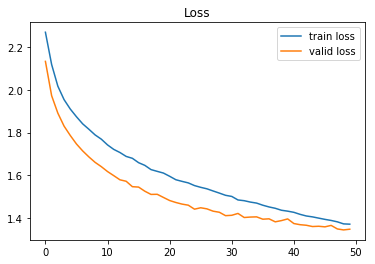

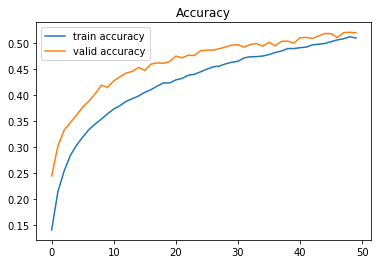

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
#層數從[512,256,128]變[512,256,128,64]，使valid_acc從0.45上升至0.51

In [40]:
Dropout_Exp=0.2

keras.backend.clear_session()#清掉舊圖
model = build_mlp(input_shape=x_train.shape[1:],drp_ratio=Drp)
optimizer = keras.optimizers.SGD(lr=Learning_rate, nesterov=True, momentum=0.95)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
model.summary()

model.fit(x_train, y_train,
            epochs=Epochs, 
            batch_size=Batch_size,
            validation_data=(x_test,y_test),
            shuffle= True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 12s 243us/step - loss: 1.3856 - acc: 0.5073 - val_loss: 1.3530 - val_acc: 0.5127
Epoch 48/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.3814 - acc: 0.5084 - val_loss: 1.3582 - val_acc: 0.5101
Epoch 49/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.3760 - acc: 0.5074 - val_loss: 1.3605 - val_acc: 0.5083
Epoch 50/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.3676 - acc: 0.5092 - val_loss: 1.3583 - val_acc: 0.5116
